In [1]:
import pandas as pd
import numpy as np
from matplotlib import *
import matplotlib.pyplot as plt
import sys
from pylab import *
import seaborn as sns

In [2]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [3]:
df_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.24,Ideal,G,VVS1,62.1,56.0,3.97,4.00,2.47
1,1,1.21,Very Good,F,VS2,62.9,54.0,6.78,6.82,4.28
2,2,0.50,Fair,E,SI1,61.7,68.0,5.09,5.03,3.12
3,3,0.50,Ideal,D,SI2,62.8,56.0,5.06,5.03,3.17
4,4,1.55,Ideal,E,SI2,62.3,55.0,7.44,7.37,4.61


In [4]:
df_train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,1.01,Very Good,E,SI2,60.0,60.0,4540,6.57,6.49,3.92
1,1,1.10,Premium,H,VS2,62.5,58.0,5729,6.59,6.54,4.10
2,2,1.50,Good,E,SI2,61.5,65.0,6300,7.21,7.17,4.42
3,3,1.53,Premium,E,SI1,61.3,59.0,12968,7.40,7.35,4.52
4,4,0.84,Fair,D,SI2,64.5,60.0,2167,5.92,5.84,3.79


## EDA

In [5]:
df_train.drop(columns = df_train.columns[0], axis = 1, inplace = True)

In [6]:
# Checking if there is any null value
df_train.isnull().mean()

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

In [7]:
df_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
df_train['color'].unique()

array(['E', 'H', 'D', 'F', 'G', 'I', 'J'], dtype=object)

In [9]:
df_train['cut'].unique()

array(['Very Good', 'Premium', 'Good', 'Fair', 'Ideal'], dtype=object)

In [10]:
df_train['clarity'].unique()

array(['SI2', 'VS2', 'SI1', 'VVS1', 'VS1', 'VVS2', 'IF', 'I1'],
      dtype=object)

In [11]:
# Checking Data Types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43154 entries, 0 to 43153
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43154 non-null  float64
 1   cut      43154 non-null  object 
 2   color    43154 non-null  object 
 3   clarity  43154 non-null  object 
 4   depth    43154 non-null  float64
 5   table    43154 non-null  float64
 6   price    43154 non-null  int64  
 7   x        43154 non-null  float64
 8   y        43154 non-null  float64
 9   z        43154 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [12]:
# Descriptive Statistics
df_train.describe()

,carat,depth,table,price,x,y,z
count,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000
mean,0.799047,61.742925,57.459010,3946.777054,5.733798,5.737574,3.539338
std,0.475214,1.428410,2.227191,3998.657385,1.123004,1.150325,0.696203
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,953.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2406.500000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5367.000000,6.540000,6.540000,4.040000
max,4.500000,79.000000,79.000000,18823.000000,10.230000,58.900000,8.060000


### There are 0 values in x, y, and z. Need to be removed

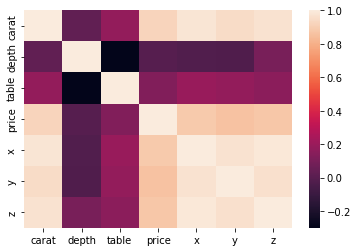

In [13]:
# To see how data is related to each other
sns.heatmap(df_train.corr())
plt.show()

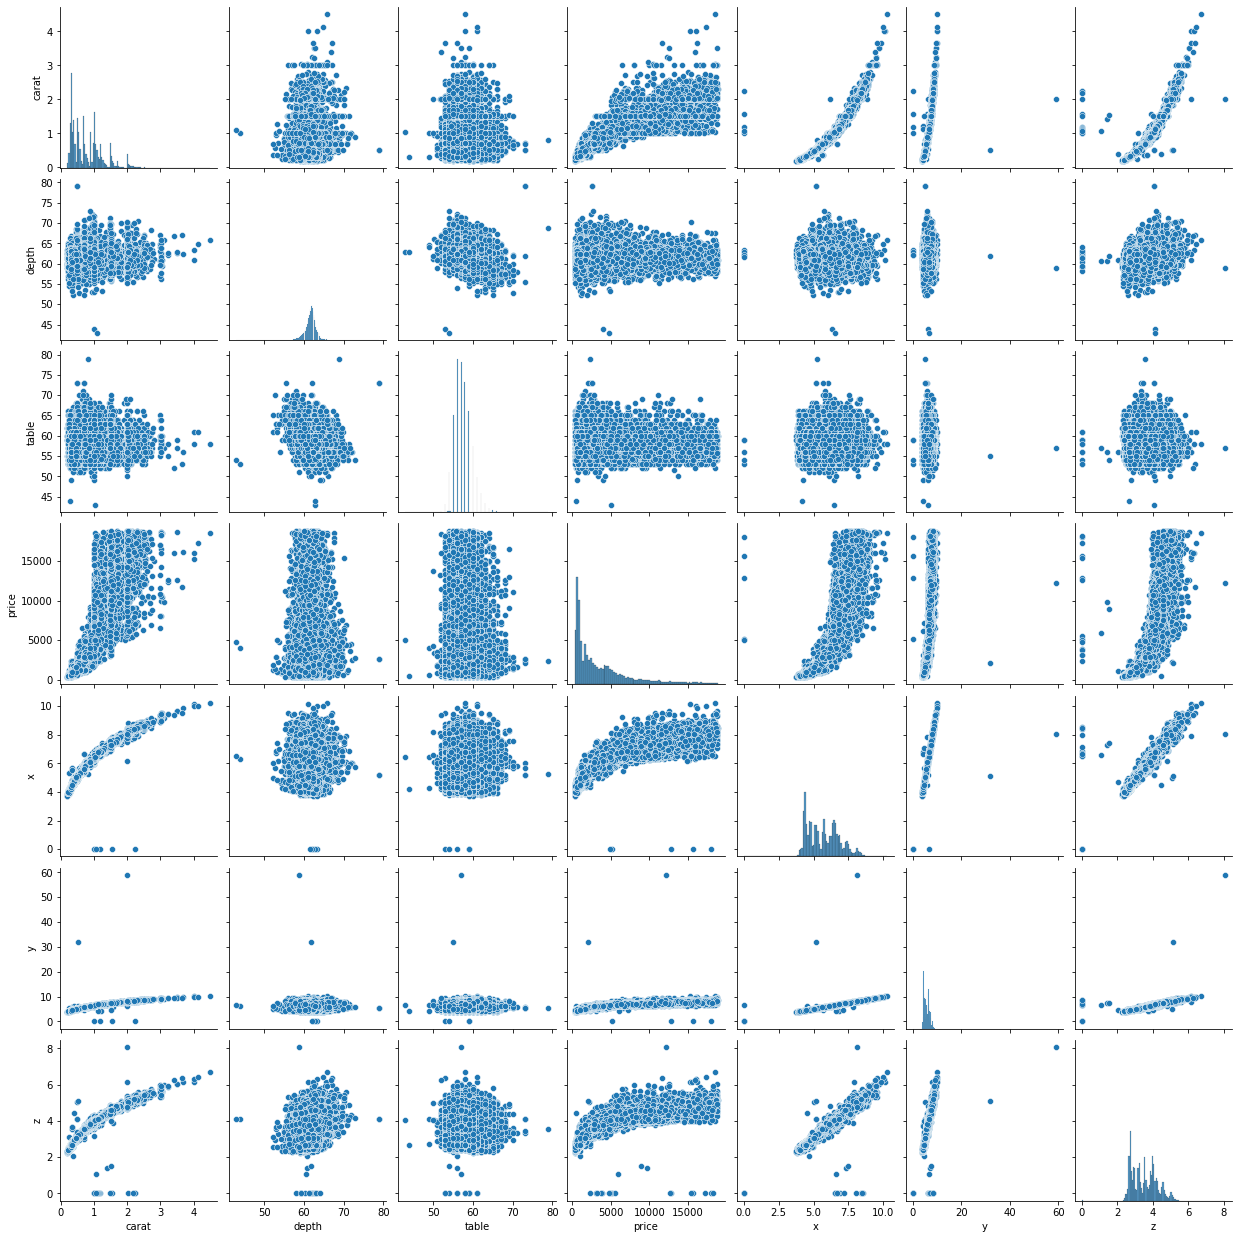

In [14]:
# To see how data is distributed.
# To check outliers in the data
sns.pairplot(df_train)
plt.show()

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

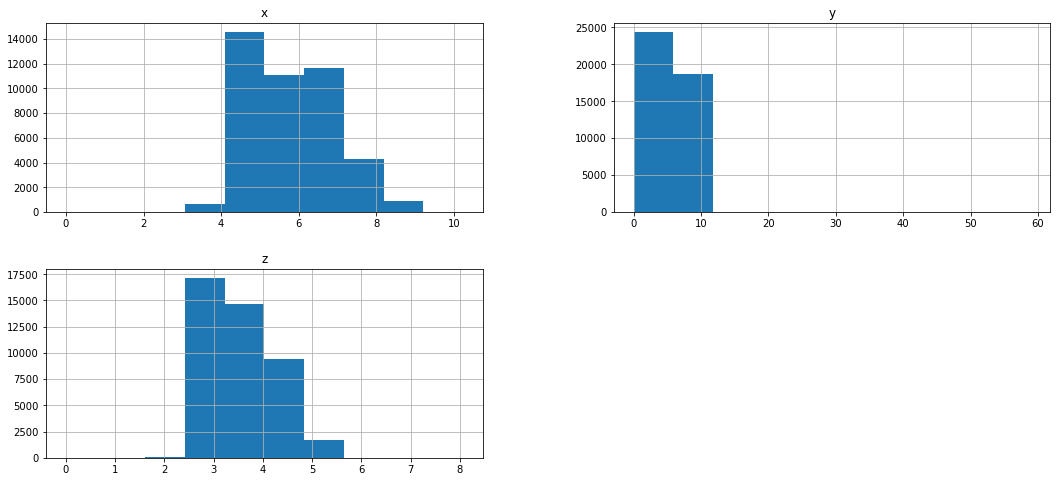

In [15]:
df_train.hist(['x','y','z'], figsize=(18,8))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x'>

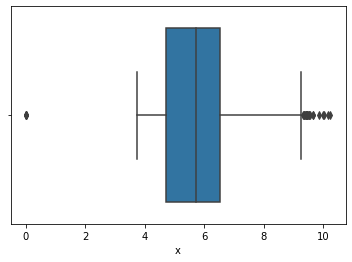

In [16]:
sns.boxplot(df_train['x'])

In [17]:
print(np.where(df_train['x']>9))

(array([  792,  5907,  6504,  6523,  6858,  6924,  8035,  8642,  8874,
        9327,  9982, 15669, 16030, 17074, 17212, 17770, 18364, 20502,
       20583, 20741, 20786, 23558, 24203, 24305, 28203, 28258, 29636,
       31008, 33872, 36977, 36986, 37454, 38110, 38374, 39101, 41173]),)


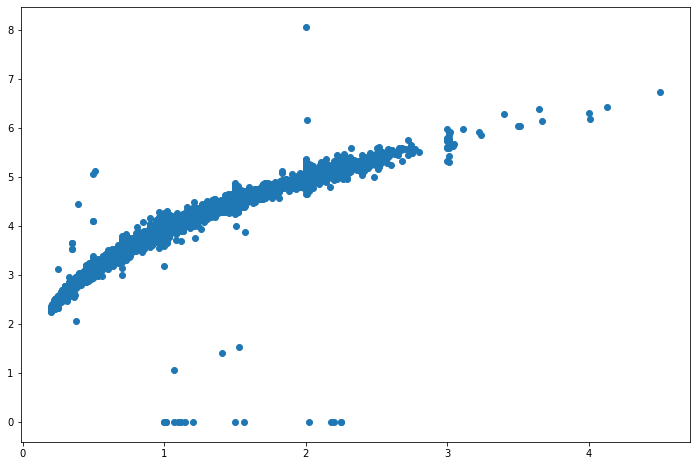

In [18]:
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(df_train['carat'], df_train['z'])

In [19]:
print(np.where((df_train['carat']<5) & (df_train['z']<2)))

(array([ 5973,  6234,  6672,  9106, 10028, 18590, 21968, 24481, 25902,
       26405, 28391, 30252, 30578, 31567, 34936, 35193, 41280, 42076,
       42451]),)


### There are outliers to be handled

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


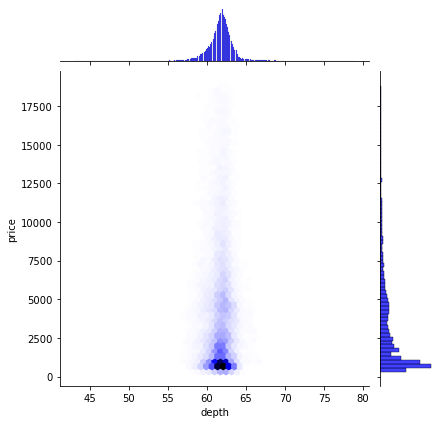

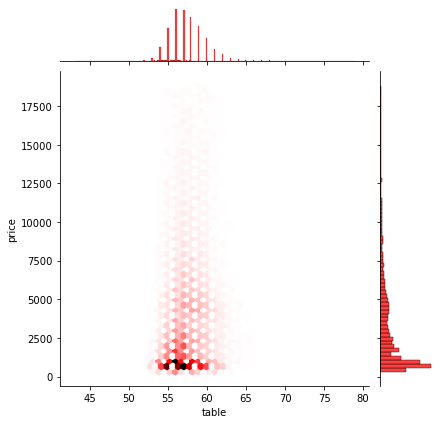

In [20]:
# To check depth, table, and price relationship
sns.jointplot('depth', 'price', data = df_train, kind = 'hex', color = 'blue')
sns.jointplot('table', 'price', data = df_train, kind = 'hex', color = 'red')
plt.show()

In [21]:
np.corrcoef(df_train['depth'], df_train['price'])[1,0], np.corrcoef(df_train['table'], df_train['price'])[1,0]

(-0.009905401627784563, 0.12496525867923249)

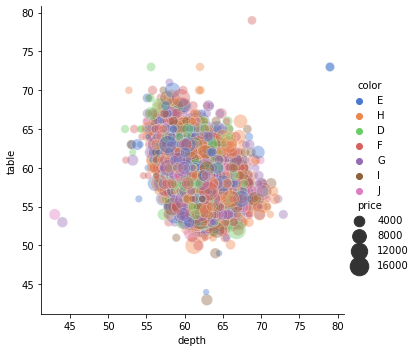

In [22]:
sns.relplot(x = 'depth', y = 'table', hue = 'color', size = 'price', sizes = (40, 400), alpha = 0.4, palette = "muted", height = 5, data = df_train)
plt.show()

### I don't see depth and table are not much related to price

In [23]:
# Removing 0 from x, y, z
df_train[['x', 'y', 'z']] = df_train[['x', 'y', 'z']].replace(0, np.NaN)
df_train.dropna(inplace = True)

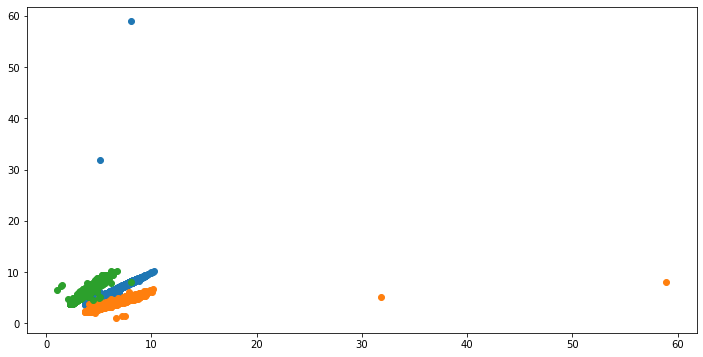

In [24]:
# x, y, z relationship and identify outliers
plt.figure(figsize = (12, 6))
plt.scatter('x', 'y', data = df_train)
plt.scatter('y', 'z', data = df_train)
plt.scatter('z', 'x', data = df_train)
plt.show()

### There are some outliers. Need to remove them.

In [25]:
df_train.sort_values(by = ['x'], ascending = False).head()

,carat,cut,color,clarity,depth,table,price,x,y,z
20741,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
8035,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
8874,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
20786,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
24305,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13


In [26]:
df_train.drop([20741, 8035, 8874, 20786, 24305, 30846, 33551, 40478, 30870, 33577, 40506, 22594, 40947], inplace = True)

In [27]:
df_train.sort_values(by = ['y'], ascending = False).head()

,carat,cut,color,clarity,depth,table,price,x,y,z
25764,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
13143,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12
5907,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03
6858,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
31008,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38


In [28]:
df_train.drop([25764, 13143, 5907, 6858, 10947], inplace = True)

In [29]:
df_train.sort_values(by = ['z'], ascending = False).head()

,carat,cut,color,clarity,depth,table,price,x,y,z
31008,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
41173,3.40,Fair,D,I1,66.8,52.0,15964,9.42,9.34,6.27
14059,2.01,Fair,G,SI2,65.6,56.0,15562,7.89,7.84,6.16
6523,3.11,Fair,J,I1,65.9,57.0,9823,9.15,9.02,5.98
30895,3.00,Fair,H,I1,67.1,57.0,8044,8.93,8.84,5.97


In [30]:
df_train.drop([35193, 9106, 10028, 9390, 31008, 41173, 14059, 10949, 13851, 22597, 10948, 13848, 22592, 31557], inplace = True)

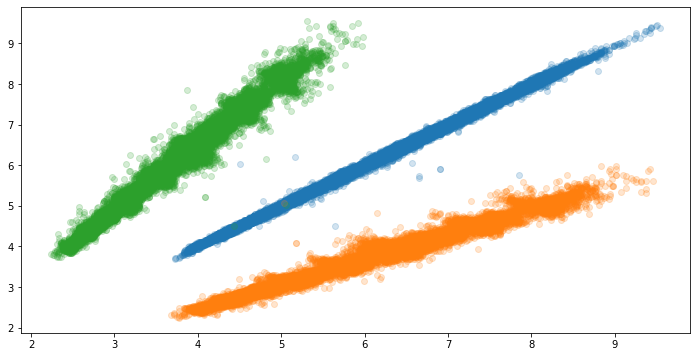

In [31]:
plt.figure(figsize = (12, 6))
plt.scatter('x', 'y', data = df_train, alpha = 0.2)
plt.scatter('y', 'z', data = df_train, alpha = 0.2)
plt.scatter('z', 'x', data = df_train, alpha = 0.2)
plt.show()

In [32]:
np.corrcoef(df_train['x'], df_train['y'])[1,0], np.corrcoef(df_train['z'], df_train['y'])[1,0], np.corrcoef(df_train['x'], df_train['z'])[1,0]

(0.9988121348524858, 0.9914467325889615, 0.9917144457003041)

### Looks like they are related to each other...it's kind of obvious because they are the size

In [33]:
# x,y,z itself is hard to see relationships, but when they are probably related to the size of carat
df_train['volume'] = df_train['x'] * df_train['y'] * df_train['z']
df_train['mean_xyz'] = (df_train['x'] + df_train['y'] + df_train['z'])/3

In [34]:
# plt.figure(figsize = (12, 6))
# plt.subplot(121)
# plt.scatter('volume', 'carat', data = df_train, color = 'b', alpha = 0.5)
# plt.xlabel('volume')
# plt.ylabel('carat')

# plt.subplot(122)
# plt.scatter('mean_xyz', 'carat', data = df_train, color = 'm', alpha = 0.5)
# plt.xlabel('mean_xyz')
# plt.ylabel('carat')

# plt.show()

np.corrcoef(df_train['volume'], df_train['carat'])[1,0], np.corrcoef(df_train['mean_xyz'], df_train['carat'])[1,0]

(0.9991319227007069, 0.9796299138016923)

In [35]:
print(np.corrcoef(df_train['carat'], df_train['price'])[1,0])

0.9221158196352763


### x,y,z are elements of carat

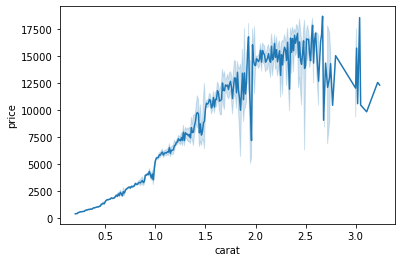

In [36]:
sns.lineplot(data = df_train, x = 'carat', y = 'price')
plt.show()

In [37]:
# carat size by (0.75 and 2.50)
c4 = df_train[['carat', 'cut', 'color', 'clarity', 'price']]
b_carat = c4[(c4['carat'] > 0.75) & (c4['carat'] < 2.50)]
s_carat = c4[c4['carat'] <= 0.75]
b_carat.shape, s_carat.shape

((18782, 5), (24209, 5))

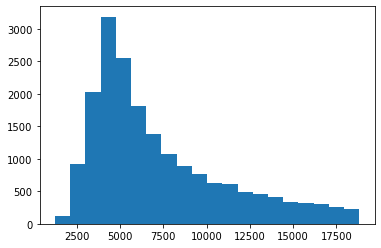

In [38]:
plt.hist(b_carat['price'], bins = 20)
plt.show()

/var/folders/g8/xdj_k37s1sd1lyggdm7gvrr00000gn/T/ipykernel_26047/177106940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_carat['count'] = 1


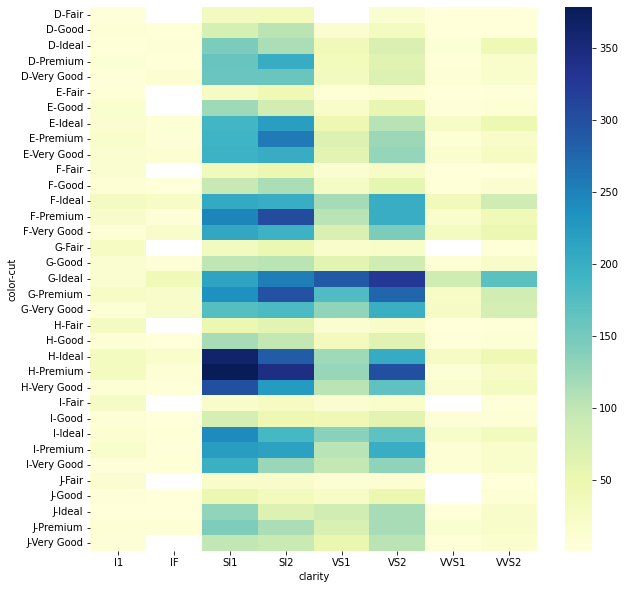

In [39]:
b_carat['count'] = 1
pv = b_carat.pivot_table('count', ['color', 'cut'], 'clarity', aggfunc = np.sum)

plt.figure(figsize = (10, 10))
sns.heatmap(pv, cmap = 'YlGnBu')
plt.show()

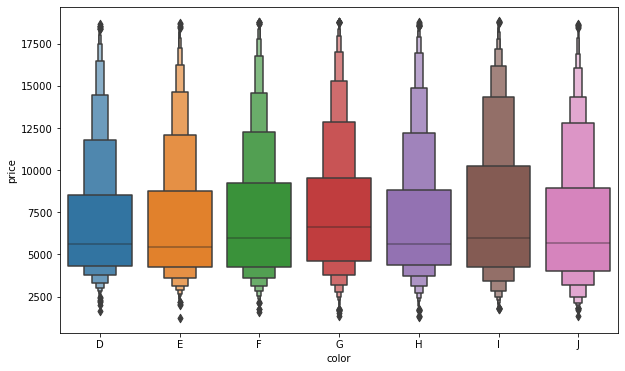

In [40]:
plt.figure(figsize = (10,6))
sns.boxenplot(data = b_carat.sort_values(by = 'color'), x = 'color', y = 'price')
plt.show()

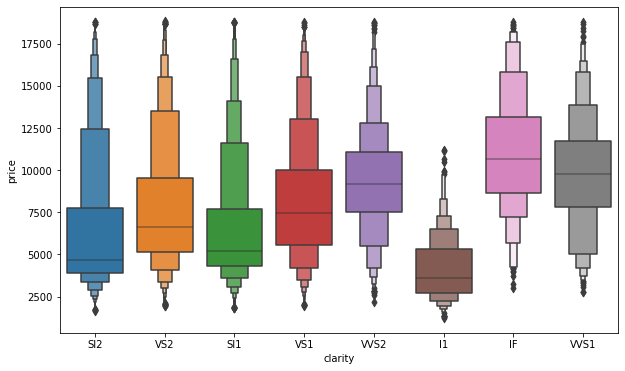

In [41]:
plt.figure(figsize = (10,6))
sns.boxenplot(data = b_carat, x = 'clarity', y = 'price')
plt.show()

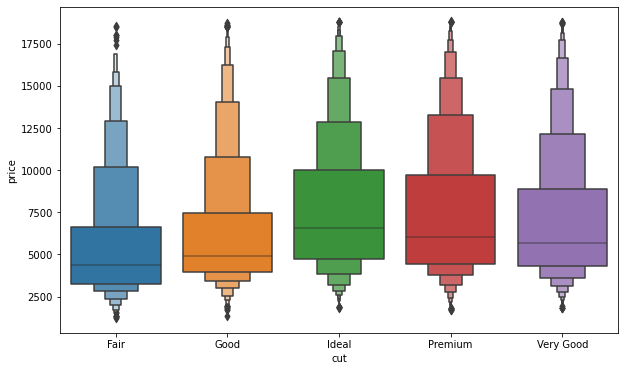

In [42]:
plt.figure(figsize = (10,6))
sns.boxenplot(data = b_carat.sort_values(by = 'cut'), x = 'cut', y = 'price')
plt.show()

In [43]:
b_carat[(b_carat['clarity'] == 'IF') & (b_carat['color'] == 'J')]

,carat,cut,color,clarity,price,count
3054,2.08,Ideal,J,IF,17986,1
11788,1.16,Ideal,J,IF,5519,1
12753,2.29,Premium,J,IF,18426,1
14872,2.29,Premium,J,IF,18594,1
18086,1.21,Good,J,IF,6299,1
22689,1.53,Premium,J,IF,9596,1
25679,1.61,Premium,J,IF,10165,1
25758,1.53,Premium,J,IF,9424,1
26806,1.61,Premium,J,IF,10350,1
35623,1.11,Good,J,IF,5361,1


In [44]:
select_dia = b_carat.copy()
select_dia['clarity'] = select_dia['clarity'].replace(['IF', 'VVS1', 'VVS2', 'I1'], np.NaN)
select_dia['color'] = select_dia['color'].replace(['D', 'E', 'F', 'J'], np.NaN)
select_dia['cut'] = select_dia['cut'].replace('Fair', np.NaN)
select_dia.dropna(axis = 0, inplace = True)

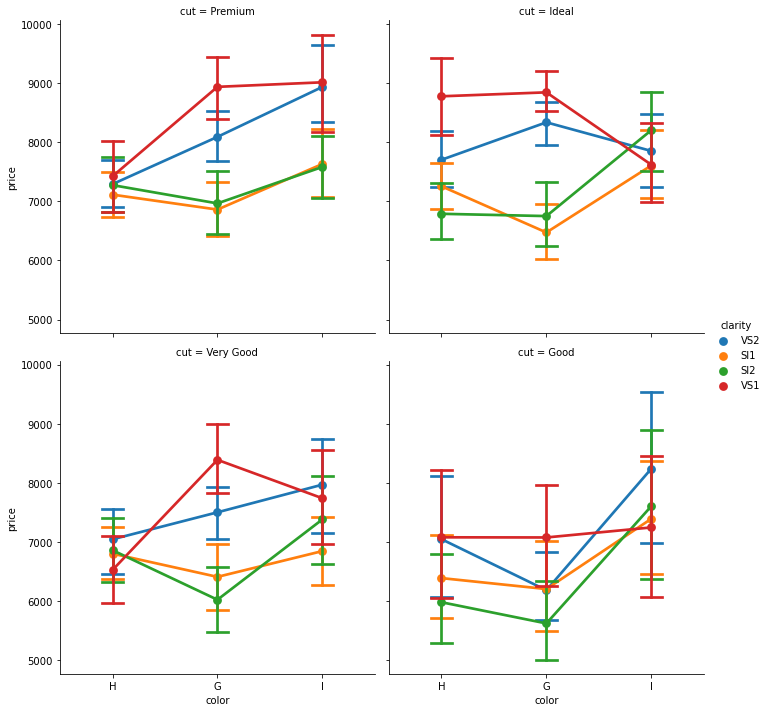

In [45]:
sns.catplot(x = 'color', y = 'price', hue = 'clarity', col = 'cut', col_wrap = 2, kind = 'point', capsize = 0.2, data = select_dia)
plt.show()

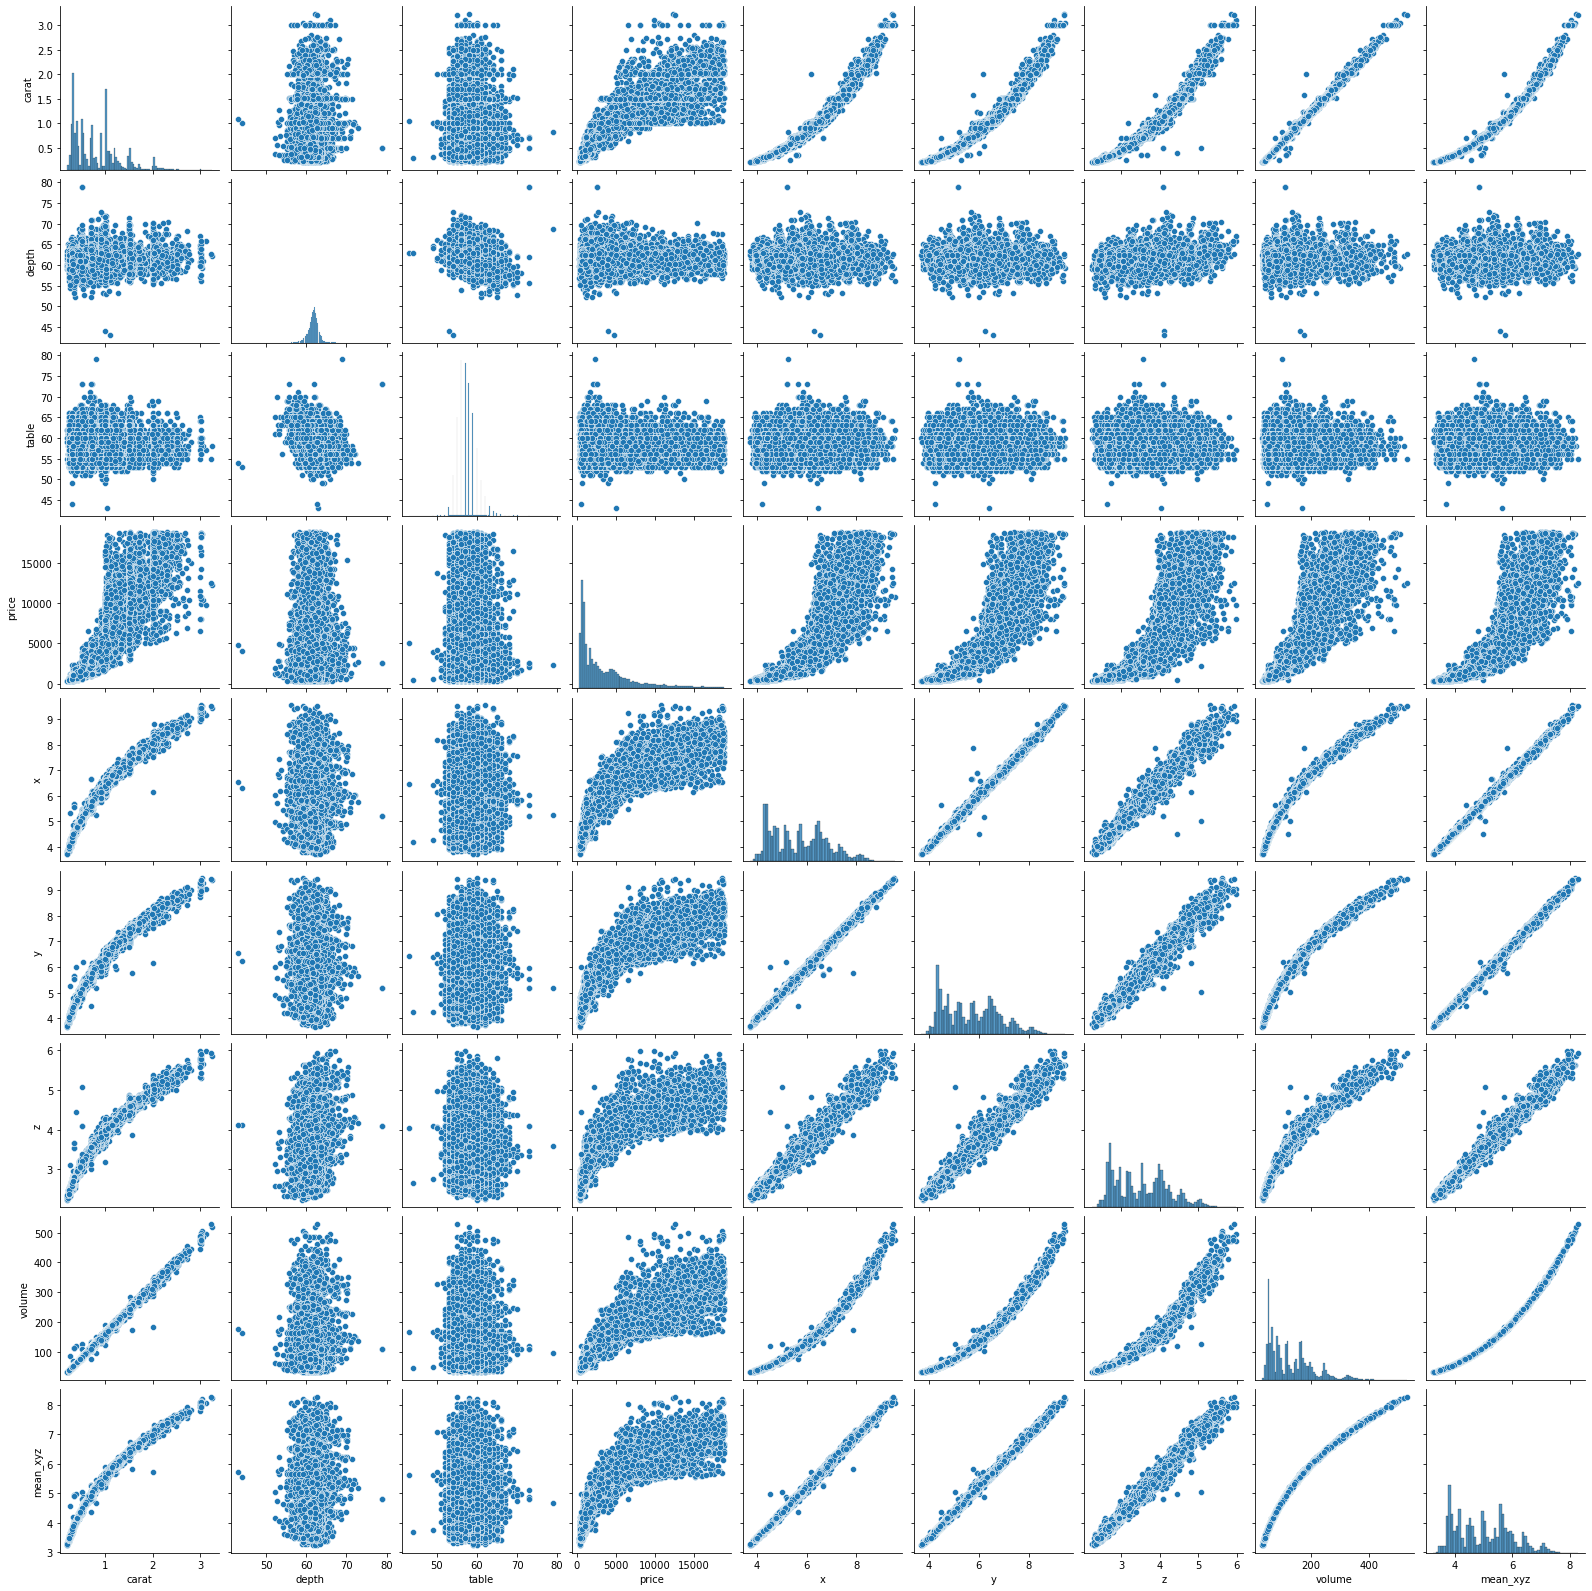

In [46]:
# Checking the data one more time
sns.pairplot(df_train)
plt.show()

## One Hot Encoding + Dummies

In [47]:
df_train['cut'].replace({'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4,'Premium':5}, inplace=True)

In [48]:
df_train['color'].replace({'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}, inplace=True)

In [49]:
df_train['clarity'].replace({'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7,'IF':8}, inplace=True)

In [50]:
df_train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,mean_xyz
0,1.01,2,6,3,60.0,60.0,4540,6.57,6.49,3.92,167.146056,5.660000
1,1.10,5,3,5,62.5,58.0,5729,6.59,6.54,4.10,176.704260,5.743333
2,1.50,1,6,3,61.5,65.0,6300,7.21,7.17,4.42,228.494994,6.266667
3,1.53,5,6,2,61.3,59.0,12968,7.40,7.35,4.52,245.842800,6.423333
4,0.84,3,7,3,64.5,60.0,2167,5.92,5.84,3.79,131.030912,5.183333


In [51]:
# df_numeric = pd.get_dummies(df_train)
# df_numeric['price'] = df_train['price']
# df_numeric.head()

## Modeling + Evaluation

In [52]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
ml_x = df_train.drop(["price", "depth", "table"],axis = 1)
ml_y = df_train["price"]
x_train, x_test, y_train, y_test = train_test_split(ml_x, ml_y, test_size = 0.2, random_state = 1)

In [54]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
predict_result = reg.predict(x_test)

In [55]:
print('accuracy: '+ str(reg.score(x_test, y_test)*100) + "%")
print('Mean squared error {}'.format(mean_squared_error(y_test, predict_result)))

accuracy: 89.72521474751153%
Mean squared error 1582228.3583089074


In [56]:
print('Root Mean squared error {}'.format(np.sqrt(mean_squared_error(y_test, predict_result))))

Root Mean squared error 1257.8665900280948


In [57]:
# Random Forest Regressor
reg_rn = ensemble.RandomForestRegressor()
reg_rn.fit(x_train, y_train)
predict_result_2 = reg_rn.predict(x_test)

In [58]:
print('Root Mean squared error {}'.format(np.sqrt(mean_squared_error(y_test, predict_result_2))))

Root Mean squared error 561.2813959884976


In [59]:
# Decision Tree Regressor
reg_tr = tree.DecisionTreeRegressor()
reg_tr.fit(x_train, y_train)
predict_result_3 = reg_tr.predict(x_test)

In [60]:
print('Root Mean squared error {}'.format(np.sqrt(mean_squared_error(y_test, predict_result_3))))

Root Mean squared error 773.0748930006015


In [61]:
# XGB Regressor
reg_xgb = xgb.XGBRegressor()
reg_xgb.fit(x_train, y_train)
predict_result_4 = reg_xgb.predict(x_test)

In [62]:
print('Root Mean squared error {}'.format(np.sqrt(mean_squared_error(y_test, predict_result_4))))

Root Mean squared error 561.2325204953015


## Test Data

In [63]:
# import pickle

In [64]:
# df_test['cut'].replace({'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4,'Premium':5}, inplace=True)

In [65]:
# df_test['color'].replace({'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}, inplace=True)

In [66]:
# df_test['clarity'].replace({'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7,'IF':8}, inplace=True)

In [67]:
# df_test['volume'] = df_test['x'] * df_test['y'] * df_test['z']
# df_test['mean_xyz'] = (df_test['x'] + df_test['y'] + df_test['z'])/3

In [68]:
# reg_rn.fit(x_train, y_train)
# pickle.dump(reg_rn, open('model.pk1', 'wb'))

In [69]:
# reg_rn = pickle.load(open('model.pk1', 'rb'))
# df_test['price'] = reg_rn.predict(df_test[['carat', 'cut', 'color', 'depth', 'table', 'clarity', 'x', 'y', 'z', 'volume', 'mean_xyz']])

In [70]:
df_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.24,Ideal,G,VVS1,62.1,56.0,3.97,4.00,2.47
1,1,1.21,Very Good,F,VS2,62.9,54.0,6.78,6.82,4.28
2,2,0.50,Fair,E,SI1,61.7,68.0,5.09,5.03,3.12
3,3,0.50,Ideal,D,SI2,62.8,56.0,5.06,5.03,3.17
4,4,1.55,Ideal,E,SI2,62.3,55.0,7.44,7.37,4.61


In [71]:
# import csv

In [72]:
# df_test[['id', 'price']].to_csv(r'/Users/ianlee/Desktop/MMF/MMF 1922 Data Science/Final Project/results_3.csv', index = False)